<a href="https://colab.research.google.com/github/AkulaTejdeep/2203A52133_DAUP-PROJECT/blob/main/2DAUPIMGPRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.4882 - loss: 1.1882 - val_accuracy: 0.4531 - val_loss: 0.6943
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5123 - loss: 0.6931 - val_accuracy: 0.4500 - val_loss: 0.6940
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5183 - loss: 0.6929 - val_accuracy: 0.4500 - val_loss: 0.6962
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5156 - loss: 0.6928 - val_accuracy: 0.4469 - val_loss: 0.6953
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4960 - loss: 0.6932 - val_accuracy: 0.4500 - val_loss: 0.7048
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5005 - loss: 0.6940 - val_accuracy: 0.4219 - val_loss: 0.6967
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5549 - loss: 0.6922 - val_accuracy: 0.4187 - val_loss: 0.7022
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5360 - loss: 0.6900 - val_accuracy: 0.4094 - v

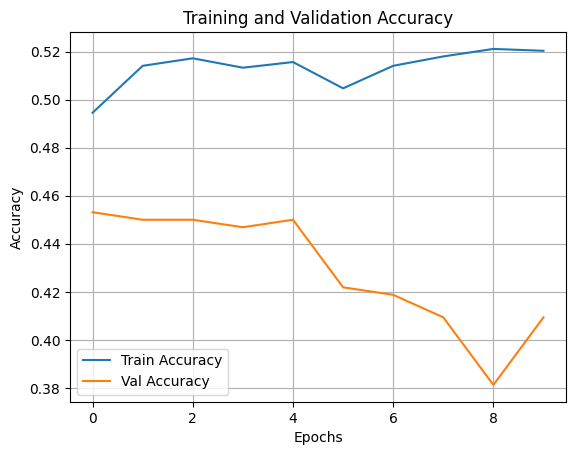

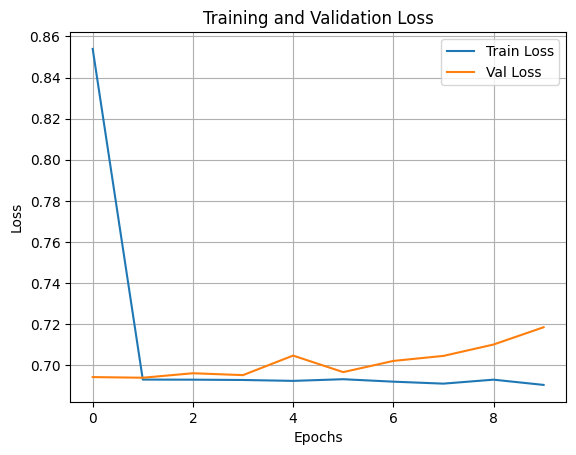

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4402 - loss: 0.7186
Test Accuracy: 0.4475
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
              precision    recall  f1-score   support

  Non-Cancer       0.31      0.08      0.13       201
      Cancer       0.47      0.82      0.60       199

    accuracy                           0.45       400
   macro avg       0.39      0.45      0.36       400
weighted avg       0.39      0.45      0.36       400



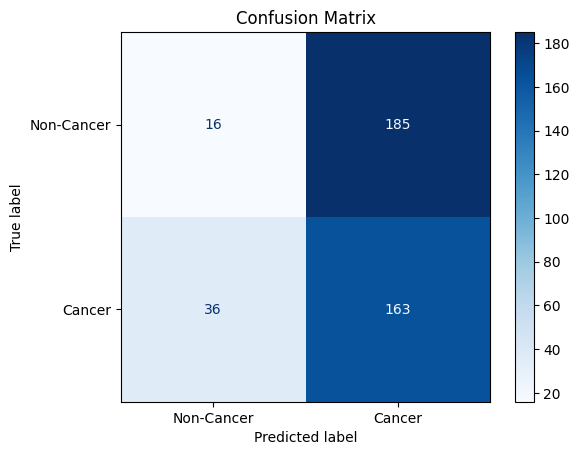

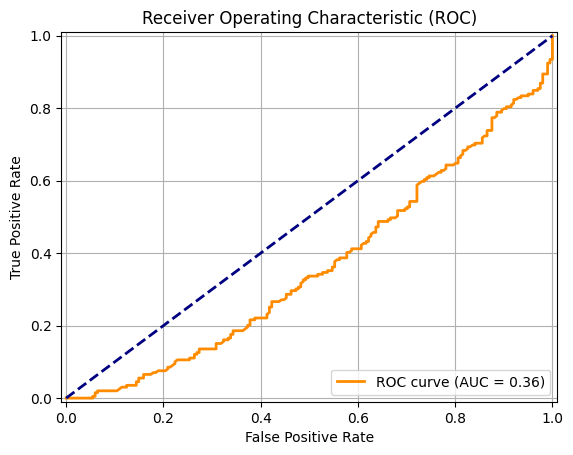

T-Test: t-statistic = -3.6596, p-value = 0.0003
Z-Test: z-score = -2.1000, p-value = 0.9821
ANOVA: F-statistic = 823.3633, p-value = 0.0000


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from scipy.stats import ttest_ind, norm, f_oneway

IMG_SIZE = 128
BATCH_SIZE = 32
EPOCHS = 10
RANDOM_STATE = 42

cancer_dir = '/content/drive/MyDrive/Blood_Cancer_Data'
non_cancer_dir = '/content/drive/MyDrive/Blood_Cancer_Data'

def load_images(folder, label, max_images=1000):
    data = []
    labels = []
    images = os.listdir(folder)[:max_images]
    for img_name in images:
        img_path = os.path.join(folder, img_name)
        try:
            img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
            img = img_to_array(img) / 255.0
            data.append(img)
            labels.append(label)
        except:
            continue
    return data, labels

cancer_images, cancer_labels = load_images(cancer_dir, label=1)
non_cancer_images, non_cancer_labels = load_images(non_cancer_dir, label=0)

data = np.array(cancer_images + non_cancer_images)
labels = np.array(cancer_labels + non_cancer_labels)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=RANDOM_STATE)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=EPOCHS, batch_size=BATCH_SIZE)

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

y_pred_probs = model.predict(X_test).ravel()
y_pred = (y_pred_probs > 0.5).astype(int)

print(classification_report(y_test, y_pred, target_names=["Non-Cancer", "Cancer"]))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Cancer", "Cancer"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

probs_cancer = y_pred_probs[y_test == 1]
probs_non_cancer = y_pred_probs[y_test == 0]

t_stat, p_value_t = ttest_ind(probs_cancer, probs_non_cancer, equal_var=False)
print(f"T-Test: t-statistic = {t_stat:.4f}, p-value = {p_value_t:.4f}")

p_hat = acc
p0 = 0.5
n = len(y_test)
z_score = (p_hat - p0) / np.sqrt(p0 * (1 - p0) / n)
p_value_z = 1 - norm.cdf(z_score)  # One-tailed
print(f"Z-Test: z-score = {z_score:.4f}, p-value = {p_value_z:.4f}")

group_1 = y_pred_probs[(y_pred_probs >= 0.0) & (y_pred_probs < 0.33)]
group_2 = y_pred_probs[(y_pred_probs >= 0.33) & (y_pred_probs < 0.66)]
group_3 = y_pred_probs[(y_pred_probs >= 0.66) & (y_pred_probs <= 1.0)]

f_stat, p_value_anova = f_oneway(group_1, group_2, group_3)
print(f"ANOVA: F-statistic = {f_stat:.4f}, p-value = {p_value_anova:.4f}")
